<a href="https://colab.research.google.com/github/Grg0rry/MoneyLion-Assessment/blob/main/MoneyLion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The practice of loans has existed for years. Still, today one of the main challenges banking faces is the risk they have to bear that their customers may not be able to pay back. Although increased measures have been set to mitigate the risk, it does not eliminate the fact that defaulting on loans will still occur. 

Therefore in this challenge, we will use prediction models to predict the likelihood of an individual repaying their loan after already funding the loan. We will also identify customer group(s) with the lowest risk of loan defaults, of which MoneyLion can put in more effort/targetted leads to attract these customers.


In [ ]:
# navigating to the dataset stored location
%cd /content/drive/MyDrive/MoneyLion

/content/drive/MyDrive/MoneyLion


In [ ]:
# Load Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Datasets
loan_df = pd.read_csv('loan.csv', parse_dates=['applicationDate','originatedDate'])
payment_df = pd.read_csv('payment.csv')
clarify_underwriting_variables_df = pd.read_csv('clarity_underwriting_variables.csv')

## Data Exploration and Cleaning

In this stage, plots, tables, and data manipulation methods will be used to first understand the datasets and identify potential patterns and areas of interest, then cleaning will be done on the datasets to further remove noise and prepare the dataset for modelling.

In [ ]:
loan_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23 17:29:01.940,False,NaT,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01 13:51:14.709,False,NaT,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06 23:58:08.880,False,NaT,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05 22:31:34.304,False,NaT,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [ ]:
loan_df.shape

(577682, 19)

In [ ]:
loan_df.isna().sum()

loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   loanId                            577426 non-null  object        
 1   anon_ssn                          577682 non-null  object        
 2   payFrequency                      576409 non-null  object        
 3   apr                               573760 non-null  float64       
 4   applicationDate                   577682 non-null  datetime64[ns]
 5   originated                        577682 non-null  bool          
 6   originatedDate                    46044 non-null   datetime64[ns]
 7   nPaidOff                          577658 non-null  float64       
 8   approved                          577682 non-null  bool          
 9   isFunded                          577682 non-null  int64         
 10  loanStatus                      

In [ ]:
loan_df.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,573760.000000,577658.000000,577682.000000,575432.000000,577682.000000,577682.000000,577682.000000
mean,553.080972,0.037887,0.067480,514.245084,1428.897209,7.854389,0.619187
std,110.046159,0.333366,0.250852,320.939929,925.009141,12.853451,0.485587
min,0.000000,0.000000,0.000000,0.000000,-816.710000,0.000000,0.000000
25%,490.000000,0.000000,0.000000,350.000000,1023.640000,3.000000,0.000000
50%,590.000000,0.000000,0.000000,500.000000,1245.250000,3.000000,1.000000
75%,601.000000,0.000000,0.000000,500.000000,1615.660000,6.000000,1.000000
max,705.590000,21.000000,1.000000,5000.000000,19963.630000,200.000000,1.000000


In [ ]:
loan_df.corr()

,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
apr,1.000000,-0.062596,-0.074328,-0.062880,-0.062981,-0.279014,-0.049065,-0.090854,-0.038632
originated,-0.062596,1.000000,0.251177,0.927619,0.914481,0.113053,0.101958,0.100570,0.141283
nPaidOff,-0.074328,0.251177,1.000000,0.267276,0.269711,0.074269,0.046704,-0.046266,-0.046038
approved,-0.062880,0.927619,0.267276,1.000000,0.985783,0.106731,0.095947,0.090248,0.119974
isFunded,-0.062981,0.914481,0.269711,0.985783,1.000000,0.105397,0.094359,0.085112,0.116856
loanAmount,-0.279014,0.113053,0.074269,0.106731,0.105397,1.000000,0.892881,0.204856,0.178698
originallyScheduledPaymentAmount,-0.049065,0.101958,0.046704,0.095947,0.094359,0.892881,1.000000,0.191381,0.169256
leadCost,-0.090854,0.100570,-0.046266,0.090248,0.085112,0.204856,0.191381,1.000000,0.210834
hasCF,-0.038632,0.141283,-0.046038,0.119974,0.116856,0.178698,0.169256,0.210834,1.000000


From the analysis above, we can observe that the loan dataset successfully imported 577682 rows and 19 columns. However, a few attributes require further transformation to change the datatypes and treat the missing values for better analysis.

However before further analysis is done, I will first filter out loans that have not been funded. In other words, `isFunded` is not 1, as I will only be analyzing on loans that have already been funded. Then I will perform data transformation to change the datatype of several attributes for analysis.

In [ ]:
# Filter out loans that were not funded 
df = loan_df[loan_df['isFunded'] == 1].reset_index(drop=True)

In [ ]:
# Perform Data Transformation (changing datatypes)
df['originated'] = df['originated'].replace([True,False],[1,0]) 
df['approved'] = df['approved'].replace([True,False],[1,0])
df['nPaidOff'] = df['nPaidOff'].fillna(0).astype(np.int64)

Next, for `loanStatus`, `payFrequency`, `leadType`, and `state`, I plan to use label encoder method to convert them into a numerical (int) datatype so that they can be used for analysis and modelling. 

In [ ]:
# Import label encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['loanStatus_N'] = le.fit_transform(df['loanStatus'])
df['payFrequency_N'] = le.fit_transform(df['payFrequency'])
df['state_N'] = le.fit_transform(df['state'])
df['leadType_N'] = le.fit_transform(df['leadType'])

In [ ]:
# Store the original label and encoder into a dictionary
le_dict = {}
le_dict['loanStatus'] = dict(zip(df['loanStatus_N'], df['loanStatus']))
le_dict['payFrequency'] = dict(zip(df['payFrequency_N'], df['payFrequency']))
le_dict['state'] = dict(zip(df['state_N'], df['state']))
le_dict['leadType'] = dict(zip(df['leadType_N'], df['leadType']))

Following, I will use `applicationDate and originatedDate` to aggregate data and further create attributes that can be used for analysis

In [ ]:
# Perform Data Transformation on applicationDate and originatedDate
df['applicationIsWeekday'] = (df['applicationDate'].dt.weekday < 5).astype(int) # output 1 for weekday, 0 for weekend
df['applicationQtr'] = df['applicationDate'].dt.quarter
df['applicationYear'] = pd.DatetimeIndex(df['applicationDate']).year 
df['diffInMin'] = (df['originatedDate'] - df['applicationDate']).astype('timedelta64[m]')

1. applicationIsWeekday: 1 for applicationDate is a weekend; 0 for applicationDate is not a weekend
2. applicationQtr: Quarter of the application made
3. applicationYear: Year of the application made
4. diffInMin: Difference between applicationDate and originatedDate in the form of minutes

In [ ]:
# drop the original label
df = df.drop(['loanStatus','payFrequency','state','leadType','applicationDate','originatedDate'], axis=1)

Perform join with `clarify_underwriting_variables_df` on the `underwritingid/clarityFraudId` attribute to get the `clearfraudscore` attribute needed for analysis

In [ ]:
# rename column to a same name for join
df = df.rename(columns={'clarityFraudId' : 'underwritingid'})

# perform left join on underwritingid
df = pd.merge(df, clarify_underwriting_variables_df[['underwritingid','clearfraudscore']], how="left", on='underwritingid')

In [ ]:
# replace missing values with 0 for clearfraudscore
df['clearfraudscore'] = df['clearfraudscore'].fillna(0)
df[df['clearfraudscore'].eq(0)].head()

# drop the attribute underwritingid and hasCF
df = df.drop(['underwritingid','hasCF'], axis=1)

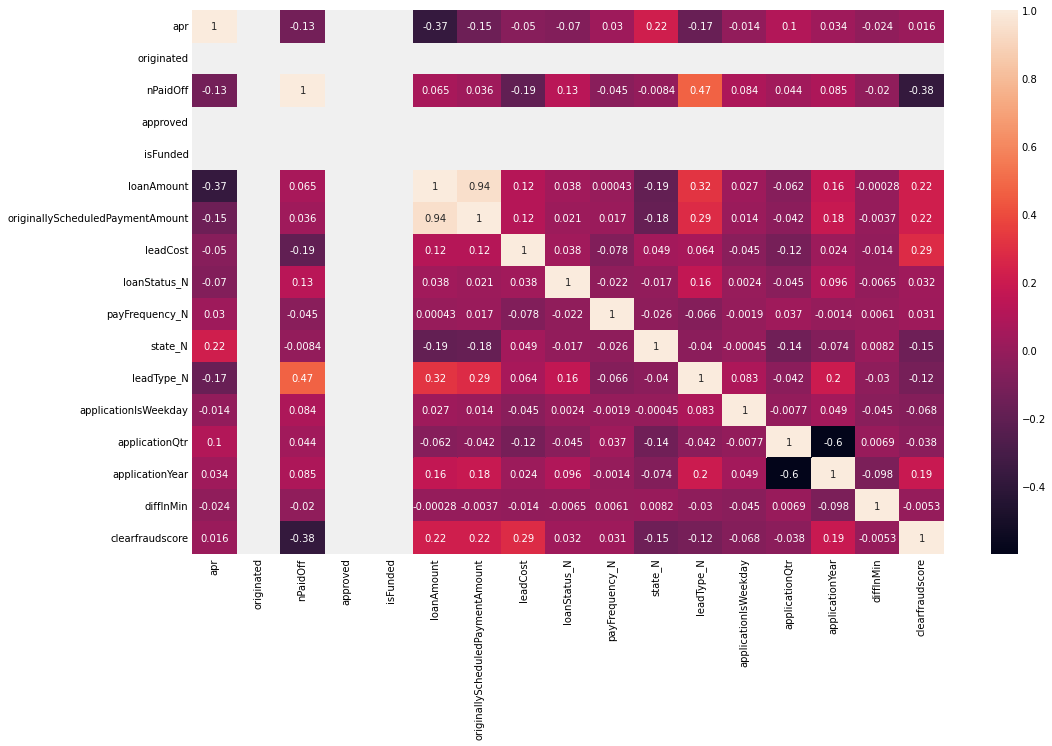

In [ ]:
 # Correlation Matrix
corrMatrix = df.corr()
plt.gcf().set_size_inches(15,10)
sns.heatmap(corrMatrix, annot=True)
plt.show()

Here I will drop the variables `originated, approved, and isFunded`. As they show one to one correlation with one another, this is because since all loans have been filtered to be funded only, it would also then be originated and approved. 

I have also decided to drop the attribute `fpStatus` because it contains missing values and also does not play a significant role in my analysis later on.

For `originallyScheduledPaymentAmount` and `loanAmount`, I will remain the attributes for further calculations and analysis, but will drop either one later as it has too close of a relationship that might affect the model.

In [ ]:
df = df.drop(['originated','approved','isFunded','fpStatus'], axis=1)

Next I categorise the `paymentStatus` into groups with similar characteristics
1. Paid: Checked
2. Pending: Pending, None, Rejected Awaiting Retry
3. Missed: Rejected, Skipped
4. Cancelled

In [ ]:
payment_df['paymentStatus'].value_counts()

Cancelled                  270334
Checked                    209621
None                       164057
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Returned                        1
Complete                        1
Name: paymentStatus, dtype: int64

In [ ]:
group_lst = {
    'Paid' : ['Checked'],
    'Pending' : ['Pending', 'None', 'Rejected Awaiting Retry'],
    'Missed' : ['Rejected', 'Skipped'],
    'Cancelled' : ['Cancelled']
    }

In [ ]:
def grouping(group):
  grouped = payment_df[payment_df['paymentStatus'].isin(group_lst[group])].groupby('loanId')
  # total summary
  totalPrincipal = grouped['principal'].agg(np.sum).reset_index(name=f'totalPrincipal{group}')
  totalFees = grouped['fees'].agg(np.sum).reset_index(name=f'totalFees{group}')
  numberOfPayments = grouped.size().reset_index(name=f'numberOfPayments{group}')
  # merge to a dataframe
  return totalPrincipal.merge(totalFees, on='loanId').merge(numberOfPayments, on='loanId')

In [ ]:
paid_df = grouping('Paid')
pending_df = grouping('Pending')
missed_df = grouping('Missed')
cancelled_df = grouping('Cancelled')

In [ ]:
paid_df.head()

,loanId,totalPrincipalPaid,totalFeesPaid,numberOfPaymentsPaid
0,LL-I-00000021,697.84,1167.77,12
1,LL-I-00000231,27.20,231.44,2
2,LL-I-00000238,259.46,903.14,7
3,LL-I-00000308,3.61,57.98,1
4,LL-I-00000419,28.18,198.13,2


In [ ]:
# merge all into a temp_df and populate missing values with 0
temp_df = pd.DataFrame(payment_df['loanId'].unique()).rename(columns={0:'loanId'})
for i in group_lst:
  temp_df = temp_df.merge(vars()[f'{i}_df'.lower()], how='left', on='loanId')

temp_df = temp_df.fillna(0)
temp_df.head()

,loanId,totalPrincipalPaid,totalFeesPaid,numberOfPaymentsPaid,totalPrincipalPending,totalFeesPending,numberOfPaymentsPending,totalPrincipalMissed,totalFeesMissed,numberOfPaymentsMissed,totalPrincipalCancelled,totalFeesCancelled,numberOfPaymentsCancelled
0,LL-I-00000021,697.84,1167.77,12.0,0.00,0.00,0.0,102.17,67.44,1.0,0.00,0.00,0.0
1,LL-I-00000231,27.20,231.44,2.0,702.47,693.24,8.0,70.33,278.63,2.0,702.47,693.24,8.0
2,LL-I-00000238,259.46,903.14,7.0,465.58,232.21,4.0,74.96,99.52,1.0,465.58,232.21,4.0
3,LL-I-00000308,3.61,57.98,1.0,191.72,424.18,10.0,4.67,56.92,1.0,191.72,424.18,10.0
4,LL-I-00000355,0.00,0.00,0.0,500.00,699.46,11.0,0.00,52.60,1.0,500.00,699.46,11.0


Following I will merge in the necessary columns from load_df and the working on df into the temp_df to further perform data aggregation and analysis.

In [ ]:
# Merge in columns from loan_df and df for further analysis and data aggregation
temp_df = temp_df.merge(df, on='loanId').merge(loan_df[['loanId','loanStatus']], on='loanId')

In [ ]:
# Aggregated data
temp_df['isPaidOff'] = (temp_df['loanAmount'] <= temp_df['totalPrincipalPaid']).astype(int)
temp_df['actualEarn'] = (temp_df['totalPrincipalPaid'] + temp_df['totalFeesPaid']) - (temp_df['loanAmount'] + temp_df['leadCost']) # 
temp_df['expectedEarn'] = (temp_df['originallyScheduledPaymentAmount'] - (temp_df['loanAmount'] + temp_df['leadCost']))
temp_df = temp_df.merge(temp_df.groupby(['anon_ssn']).size().reset_index(name='nLoanTaken'), on='anon_ssn')

1. isPaidOff: 1 for Paid Off Loan; 0 for Not Paid Off due to loan settled or defaulted
2. actualEarn: Total earned after deducting leadCost and loanAmount
3. expectedEarn: Total originally expected to earn after deducting leadCost and loanAmount
4. nLoanTaken: Number of loan taken by the same customer (including paid off or not paid off loans)


In [ ]:
# Drop records of loans that are still active (numberOfPaymentsPending)
temp_df = temp_df[temp_df['numberOfPaymentsPending'] == 0]

In [ ]:
temp_df.shape

(23571, 33)

In [ ]:
# Paid off loans
temp_df['isPaidOff'].value_counts()

0    13065
1    10506
Name: isPaidOff, dtype: int64

In [ ]:
# Paid off loans early
tmp = temp_df[temp_df['isPaidOff'] == 1]
((tmp['totalPrincipalPaid'] + tmp['totalFeesPaid']) < tmp['originallyScheduledPaymentAmount']).astype(int).value_counts()

1    7296
0    3210
dtype: int64

Roughly from the aggregated data, we can observe the presence of pending payments indicating that some loans are still active and have not been paid off yet. However, I decided to drop such records as it could jeopardize the prediction model later on. Since it is not paid yet, the loan will be marked as not paid off and recognized as losses. However, in reality, the loan could be good, but just that the customer has not made their payment as it is not due. 

Therefore we are left with a total of 23571 loan records - of which, 13065 have not been paid (0), and 10506 have been paid off (1). Further analysis found that out of those that paid, 7296 have paid their loan ahead of time (1) and 3210 paid as per schedule (0).

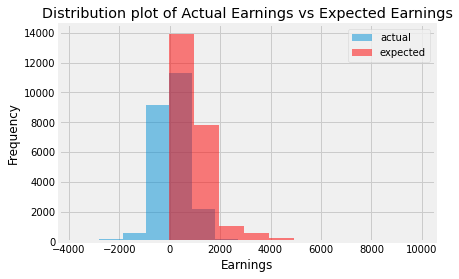

In [ ]:
axes = temp_df['actualEarn'].hist(alpha=0.5, label='actual')
temp_df['expectedEarn'].hist(ax=axes, color='r', alpha=0.5, label='expected')

plt.title('Distribution plot of Actual Earnings vs Expected Earnings')
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

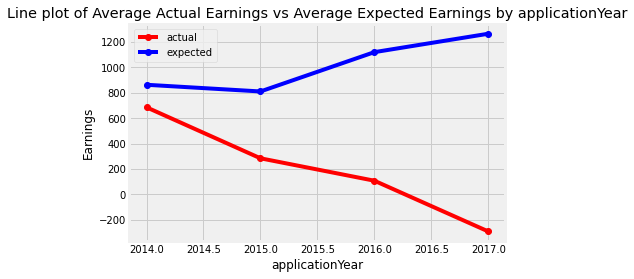

In [ ]:
plt.plot(temp_df['applicationYear'].unique(), temp_df.groupby(['applicationYear'])['actualEarn'].mean().reset_index()['actualEarn'], color='red', marker='o', label='actual')
plt.plot(temp_df['applicationYear'].unique(), temp_df.groupby(['applicationYear'])['expectedEarn'].mean().reset_index()['expectedEarn'], color='blue', marker='o', label='expected')

plt.title('Line plot of Average Actual Earnings vs Average Expected Earnings by applicationYear')
plt.xlabel('applicationYear')
plt.ylabel('Earnings')
plt.legend()
plt.show()

In [ ]:
ipofreq1 = temp_df[temp_df['isPaidOff'] == 1].groupby(['applicationYear'])['isPaidOff'].size().reset_index()
ipofreq2 = temp_df[temp_df['isPaidOff'] == 0].groupby(['applicationYear'])['isPaidOff'].size().reset_index(name='isNotPaidOff')
ipofreq3 = temp_df.groupby(['applicationYear']).size().reset_index(name='total_loans')
ipo_df = ipofreq1.merge(ipofreq2, on='applicationYear').merge(ipofreq3, on='applicationYear')
ipo_df['isPaidOff_Percent'] = ipo_df['isPaidOff'] / ipo_df['total_loans']
ipo_df['isNotPaidOff_Percent'] = ipo_df['isNotPaidOff'] / ipo_df['total_loans']

print(f'number of loans paid off and not paid off\n{"-"*40}')
ipo_df[['applicationYear','isPaidOff','isPaidOff_Percent','isNotPaidOff','isNotPaidOff_Percent','total_loans']]

number of loans paid off and not paid off
----------------------------------------


,applicationYear,isPaidOff,isPaidOff_Percent,isNotPaidOff,isNotPaidOff_Percent,total_loans
0,2014,43,0.741379,15,0.258621,58
1,2015,3389,0.542848,2854,0.457152,6243
2,2016,6220,0.416221,8724,0.583779,14944
3,2017,854,0.367154,1472,0.632846,2326


In [ ]:
print(f'summary of loanAmount by applicationYear\n{"-"*40}')
temp_df.groupby(['applicationYear'])['loanAmount'].agg(['sum','min','mean','max']).reset_index()

summary of loanAmount by applicationYear
----------------------------------------


,applicationYear,sum,min,mean,max
0,2014,34650.0,300.0,597.413793,1250.0
1,2015,3140245.0,100.0,503.002563,3000.0
2,2016,9817684.0,200.0,656.964936,4687.0
3,2017,1591199.0,300.0,684.092433,3500.0


In the first histogram plot, we can observe that the actual earnings fall short compared to the expected earnings, and the actual earnings have touched into losses. 

Upon further analysis using the line plot and summary tables created, we observe a significant drop in earnings after 2014 and that the percentage of loans not paid off is increasing by 5 to 10 percent each year. Not only that, but the loan amount borrowed is also increasing each year.

**Hence this shows a bad sign for the business, as it indicates that the amount borrowed and the number of customer borrowing is increasing, but the number of customers paying back is decreasing. 

This is illustrated in 2016, even though there was a spike in the number of customers taking up loans. Still, the earnings dropped relatively significantly from the expected earnings, and more than half of those customers did not repay their loans. 

In [ ]:
lngroup = temp_df.groupby(['applicationYear','applicationQtr'])
lnqtr = lngroup.size().reset_index(name='total_qtr_loans')
lnapr = lngroup['apr'].mean().reset_index(name='average_apr')
lnlead = lngroup['leadType_N'].mean().reset_index(name='leadType')
lnstate = lngroup['state_N'].mean().reset_index(name='state')
ln_df = lnqtr.merge(lnapr, on=['applicationYear','applicationQtr']).merge(lnlead, on=['applicationYear','applicationQtr']).merge(lnstate, on=['applicationYear','applicationQtr'])

print(f'loan_summary by quarter\n{"-"*40}')
ln_df

loan_summary by quarter
----------------------------------------


,applicationYear,applicationQtr,total_qtr_loans,average_apr,leadType,state
0,2014,4,58,498.054310,4.034483,28.068966
1,2015,1,226,510.046327,1.460177,29.783186
2,2015,2,952,496.924475,1.653361,31.417017
3,2015,3,1109,492.537015,1.737601,25.641118
4,2015,4,3956,529.293971,2.171891,23.028059
5,2016,1,3326,520.965834,2.433854,22.547204
6,2016,2,3700,496.619329,3.218108,22.153243
7,2016,3,3241,489.778293,3.347424,19.547362
8,2016,4,4677,580.760793,2.821039,18.578790
9,2017,1,2326,564.006965,3.302666,22.804815


In [ ]:
print([le_dict['leadType'][i] for i in le_dict['leadType'] if i in [2,3]])

['instant-offer', 'express']


In [ ]:
print([le_dict['state'][i] for i in le_dict['state'] if i in [19,20,22,23]])

['MO', 'NC', 'ND', 'MN']


Next, we can further analyze and see that after Q4 of 2015, there is a rise in the number of people borrowing loans even though the average annual interest rate increased. Of these groups of people, we can observe that majority are from the state of North Carolina (NC), North Dakota (ND), Missouri (MO), and Minnesota (MN). Besides that, most of them were led by the promotion of express and instant-offer. 

In [ ]:
# merge temp_df back to main df
df = df.merge(
    temp_df[['loanId','numberOfPaymentsPaid','numberOfPaymentsMissed','numberOfPaymentsCancelled','actualEarn','expectedEarn','isPaidOff','nLoanTaken']]
    , on='loanId')

df = df.drop(['originallyScheduledPaymentAmount','loanId','anon_ssn'], axis=1) # Dropped for better modelling performance

Continuing my analysis, I further dive into analyzing the different customer groups that MoneyLion can target, which will have a better/positive outcome when giving a loan to them.

In [ ]:
df.to_csv('/content/drive/MyDrive/MoneyLion/data.csv')

## Clustering Model
Identify customer groups with the lowest risk of loan defaults/settlement using clustering

In [ ]:
%pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

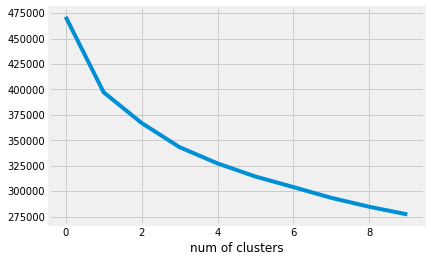

Number of Cluster: 4


In [ ]:
# find the most optimal k value
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_std)
    sse.append(kmeans.inertia_)

plt.plot(sse)
plt.xlabel('num of clusters')
plt.show()

kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print(f'Number of Cluster: {kl.elbow}')

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(df_std)

KMeans(init='random', n_clusters=6, random_state=42)

In [ ]:
df_kmeans = df_std.copy()
df_kmeans['Segment K-means'] = kmeans.labels_
df_kmeans.groupby(['Segment K-means']).mean()

,apr,nPaidOff,loanAmount,leadCost,loanStatus_N,payFrequency_N,state_N,leadType_N,applicationIsWeekday,applicationQtr,applicationYear,diffInMin,clearfraudscore,numberOfPaymentsPaid,numberOfPaymentsMissed,numberOfPaymentsCancelled,actualEarn,expectedEarn,isPaidOff,nLoanTaken
Segment K-means,,,,,,,,,,,,,,,,,,,,
0,0.204412,-0.228370,-0.154136,-0.000407,-0.841104,-0.689514,-0.003705,-0.216362,-0.003284,0.022335,0.134683,-0.014773,0.077360,-0.601331,0.578061,-0.111402,-0.573234,-0.098821,-0.891212,-0.403320
1,-0.192186,-0.112217,-0.139899,-0.054456,0.779022,1.373595,0.010397,-0.105259,-0.079451,-0.108110,-0.433660,0.139319,-0.008841,2.440811,-0.460796,-0.918177,1.097902,-0.174405,0.834981,0.231867
2,0.377931,-0.245673,-0.162301,-0.114159,-0.665840,1.347192,-0.048429,-0.331878,-0.007497,0.116209,0.218667,-0.045882,0.139677,-0.374559,0.609256,1.187571,-0.539218,0.022885,-0.740558,-0.392869
3,-0.343520,1.937701,0.052930,-0.474278,0.569694,-0.199814,0.255407,1.285060,0.245981,0.074748,0.236803,-0.098313,-1.429201,-0.122427,-0.634766,-0.075274,0.291639,-0.087915,0.754704,1.572942
4,-2.295850,-0.221083,4.687057,0.149325,-0.147752,0.116037,-1.422983,1.172909,0.095815,-0.250143,0.347116,0.182287,0.822808,-0.101508,0.207291,1.630422,-1.088814,4.067307,-0.183576,-0.304175
5,-0.085264,-0.211528,-0.128580,0.239629,0.921961,-0.477948,0.072091,-0.070684,-0.062143,-0.072087,-0.274745,0.023579,0.246468,0.241585,-0.679526,-0.516049,0.645122,-0.194334,0.947597,0.104935


In [ ]:
df_kmeans.groupby(['Segment K-means']).agg(pd.Series.mode)

,apr,nPaidOff,loanAmount,leadCost,loanStatus_N,payFrequency_N,state_N,leadType_N,applicationIsWeekday,applicationQtr,applicationYear,diffInMin,clearfraudscore,numberOfPaymentsPaid,numberOfPaymentsMissed,numberOfPaymentsCancelled,actualEarn,expectedEarn,isPaidOff,nLoanTaken
Segment K-means,,,,,,,,,,,,,,,,,,,,
0,0.535023,-0.356434,-0.261876,-0.367234,-0.992978,-0.807781,0.563748,-0.970543,0.487824,1.099921,0.291678,-0.341554,-2.211407,-0.972701,0.635615,0.181095,-0.779436,-0.201786,-0.896735,-0.481926
1,0.535023,-0.356434,-0.261876,-0.504166,0.737813,1.420251,-0.934178,-0.970543,0.487824,-0.557343,0.291678,-0.343309,-2.211407,2.632235,-1.005627,-1.181048,"[0.9496344747051436, 1.603173018791447]",0.236016,1.115157,-0.481926
2,0.535023,-0.356434,-0.261876,-0.367234,-0.992978,1.420251,0.563748,-0.970543,0.487824,1.099921,0.291678,-0.341359,-2.211407,-0.972701,0.635615,1.790899,-0.929537,0.057745,-0.896735,-0.481926
3,0.535023,0.611481,-0.703053,-0.504166,0.737813,-0.807781,0.563748,1.161354,0.487824,1.099921,0.291678,-0.343505,-2.211407,-0.822496,-1.005627,-1.181048,-0.17453,"[-0.8709327806578067, -0.4950823347192268, -0....",1.115157,0.706304
4,-2.833417,-0.356434,5.252835,-0.504166,-0.992978,-0.807781,-1.776762,1.516670,0.487824,"[-0.557342838317223, 0.2712889291846858]",0.291678,-0.338432,-2.211407,-0.822496,-1.005627,0.181095,-4.677552,"[3.3647420455140735, 3.406414052811168]",-0.896735,-0.481926
5,0.535023,-0.356434,-0.703053,-0.504166,0.737813,-0.807781,0.563748,-0.970543,0.487824,1.099921,0.291678,-0.343700,-2.211407,0.829767,-1.005627,-1.181048,-0.183536,"[-0.919256779181829, 0.008773646677602887, 0.0...",1.115157,-0.481926


In [ ]:
df_kmeans.groupby(['Segment K-means']).size().reset_index(name='number of datapoints')

,Segment K-means,number of datapoints
0,0,7286
1,1,1946
2,2,4483
3,3,2361
4,4,615
5,5,6880


From the analysis above, we can see that four clusters have been formed, of which clusters 3 and 4 represent medium to low-risk customers with a higher chance of paying back the borrowed loan, whereas 1 and 2 represent the opposite (high-risk). 

Hence, upon further analysis of the low-risk customers' characteristics, we can say that they have fewer payments missed and cancelled. Not only that, but they also have more loans taken but at a lower loan amount. 

However, there are not enough attributes to better classify and group them. In the future, there could be more attributes like Age, Gender, Income level, level of education, etc., of which, with this information, we can even better group them and use it to better target those with a higher probability of paying back the loan owed. 

## Predictive Model
Predict the likelihood of an individual repaying back their loan borrowed

Before we perform any modeling techniques, I first review the distribution of the dataframe and ensure that the data are normalized. Then I will perform features/attribute selection to select the most useful features that will contribute better to the model's performance.

In [ ]:
df.describe()

,apr,nPaidOff,loanAmount,leadCost,loanStatus_N,payFrequency_N,state_N,leadType_N,applicationIsWeekday,applicationQtr,applicationYear,diffInMin,clearfraudscore,numberOfPaymentsPaid,numberOfPaymentsMissed,numberOfPaymentsCancelled,actualEarn,expectedEarn,isPaidOff,nLoanTaken
count,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000,23571.000000
mean,527.895888,0.368249,618.716983,11.045564,3.721140,1.450214,21.978363,2.731492,0.807772,2.672606,2015.828900,1766.814730,585.964490,6.475797,1.225447,9.537567,116.275172,1051.800595,0.445717,1.405583
std,116.079926,1.033171,453.342495,21.909039,1.733349,1.795345,10.681661,2.814455,0.394059,1.206834,0.586619,5126.138897,264.979223,6.657679,1.218615,8.075685,666.233446,772.717350,0.497055,0.841605
min,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3700.000000,-6.000000,0.000000,1.000000
25%,449.990000,0.000000,350.000000,0.000000,2.000000,0.000000,12.000000,0.000000,1.000000,2.000000,2015.000000,51.000000,520.000000,1.000000,0.000000,3.000000,-306.000000,615.330000,0.000000,1.000000
50%,590.000000,0.000000,500.000000,3.000000,3.000000,0.000000,22.000000,4.000000,1.000000,3.000000,2016.000000,340.000000,655.000000,4.000000,1.000000,9.000000,81.880000,853.890000,0.000000,1.000000
75%,590.000000,0.000000,700.000000,10.000000,5.000000,4.000000,28.000000,6.000000,1.000000,4.000000,2016.000000,1432.000000,773.000000,11.000000,2.000000,12.000000,481.840000,1227.605000,1.000000,2.000000
max,705.590000,20.000000,4687.000000,200.000000,10.000000,4.000000,40.000000,9.000000,1.000000,4.000000,2017.000000,353326.000000,965.000000,48.000000,19.000000,104.000000,5477.720000,9843.400000,1.000000,12.000000


In [ ]:
df.agg(['mean','median','std','skew','kurtosis'])

,apr,nPaidOff,loanAmount,leadCost,loanStatus_N,payFrequency_N,state_N,leadType_N,applicationIsWeekday,applicationQtr,applicationYear,diffInMin,clearfraudscore,numberOfPaymentsPaid,numberOfPaymentsMissed,numberOfPaymentsCancelled,actualEarn,expectedEarn,isPaidOff,nLoanTaken
mean,527.895888,0.368249,618.716983,11.045564,3.721140,1.450214,21.978363,2.731492,0.807772,2.672606,2015.828900,1766.814730,585.964490,6.475797,1.225447,9.537567,116.275172,1051.800595,0.445717,1.405583
median,590.000000,0.000000,500.000000,3.000000,3.000000,0.000000,22.000000,4.000000,1.000000,3.000000,2016.000000,340.000000,655.000000,4.000000,1.000000,9.000000,81.880000,853.890000,0.000000,1.000000
std,116.079926,1.033171,453.342495,21.909039,1.733349,1.795345,10.681661,2.814455,0.394059,1.206834,0.586619,5126.138897,264.979223,6.657679,1.218615,8.075685,666.233446,772.717350,0.497055,0.841605
skew,-0.946733,7.077111,3.407921,4.165785,0.762086,0.547990,-0.102904,0.255655,-1.562193,-0.203765,-0.020930,21.873192,-1.260261,1.369578,1.138812,1.339318,0.134803,3.127417,0.218436,3.706020
kurtosis,0.030384,86.272758,14.502623,23.333536,0.474242,-1.564059,-1.069163,-1.582367,0.440484,-1.520164,-0.139210,1109.843690,0.561655,1.513305,3.755037,5.890393,4.029236,15.780055,-1.952451,24.825870


In [ ]:
# columns that need to be normalized
col = ['apr','loanAmount','leadCost','diffInMin','clearfraudscore','actualEarn','expectedEarn']

To normalize and transform the data, I will be using Normalizer from the sklearn library to do so.

In [ ]:
from sklearn.preprocessing import Normalizer

normalize = Normalizer()
df_norm[col] = normalize.fit_transform(df_norm[col])

In [ ]:
df_norm.agg(['mean','median','std','skew','kurtosis'])

,apr,nPaidOff,loanAmount,leadCost,loanStatus_N,payFrequency_N,state_N,leadType_N,applicationIsWeekday,applicationQtr,applicationYear,diffInMin,clearfraudscore,numberOfPaymentsPaid,numberOfPaymentsMissed,numberOfPaymentsCancelled,actualEarn,expectedEarn,isPaidOff,nLoanTaken
mean,0.297501,0.368249,0.296759,0.005732,3.721140,1.450214,21.978363,2.731492,0.807772,2.672606,2015.828900,0.379193,0.312256,6.475797,1.225447,9.537567,0.057514,0.492840,0.445717,1.405583
median,0.302201,0.000000,0.304107,0.002090,3.000000,0.000000,22.000000,4.000000,1.000000,3.000000,2016.000000,0.223886,0.334597,4.000000,1.000000,9.000000,0.035746,0.532152,0.000000,1.000000
std,0.146921,1.033171,0.130909,0.011639,1.733349,1.795345,10.681661,2.814455,0.394059,1.206834,0.586619,0.364829,0.199512,6.657679,1.218615,8.075685,0.280437,0.213332,0.497055,0.841605
skew,0.054800,7.077111,0.081703,4.871391,0.762086,0.547990,-0.102904,0.255655,-1.562193,-0.203765,-0.020930,0.477207,-0.047812,1.369578,1.138812,1.339318,0.188684,-0.460895,0.218436,3.706020
kurtosis,-0.474307,86.272758,0.415495,35.053888,0.474242,-1.564059,-1.069163,-1.582367,0.440484,-1.520164,-0.139210,-1.378471,-0.850532,1.513305,3.755037,5.890393,-0.843521,-0.686858,-1.952451,24.825870


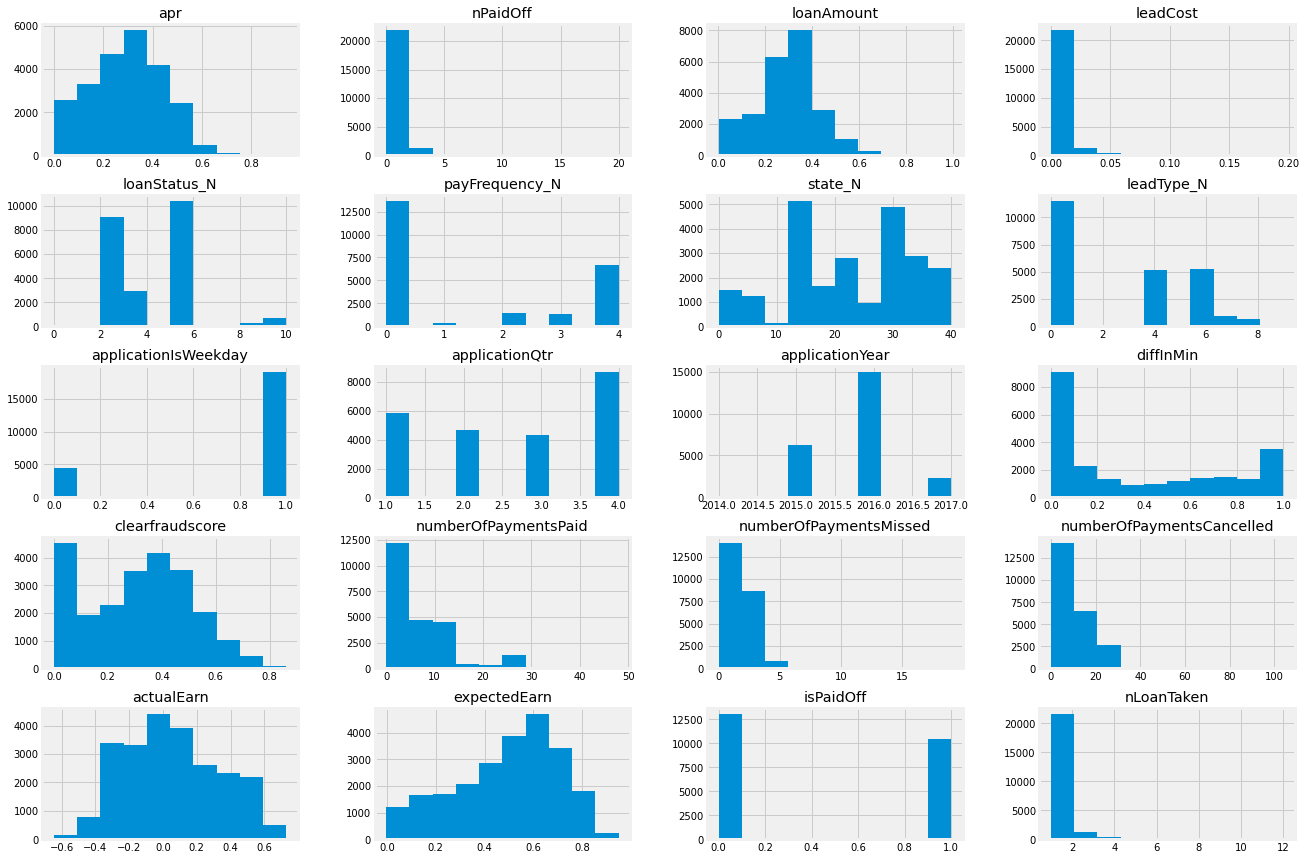

In [ ]:
df_norm.hist()
plt.gcf().set_size_inches(20,15)
plt.show()

Next I perform feature selection, and will do so with ANOVA as my target (dependent variable) is a categorical datatype and independent variable is of numerical datatype.

Reference: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

Feature Score:
apr                            88.98039909703981   
nPaidOff                       553.4816540992869   
loanAmount                     9.433735797234672   
leadCost                       21.961366181580654  
loanStatus_N                   15663.771903622577  
payFrequency_N                 51.75841119696951   
state_N                        29.329479940709682  
leadType_N                     569.059173633098    
applicationIsWeekday           0.2789018084914034  
applicationQtr                 58.58175975080433   
applicationYear                227.87621657906706  
diffInMin                      0.2844136375842087  
clearfraudscore                24.404316875548226  
numberOfPaymentsPaid           4750.406765292876   
numberOfPaymentsMissed         13139.447908653583  
numberOfPaymentsCancelled      2444.8495964271133  
actualEarn                     16942.75458553169   
expectedEarn                   293.4072166188428   
nLoanTaken                     3016.1972547131923

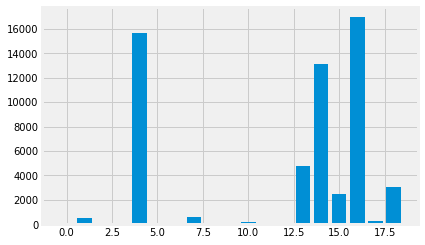

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Split dataset into dependent and independent variable
X = df_norm.drop(['isPaidOff'], axis=1)
y = df_norm['isPaidOff']

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Feature selection
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Feature Score
fs_score = list(zip(list(X.columns),fs.scores_))
print(f'Feature Score:')
for feature, score in fs_score:
  print ("{:<30} {:<20}".format(feature,score))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Based of the analysis above, the feature selected are:
* loanStatus_N
* numberOfPaymentsMissed
* actualEarn
* numberOfPaymentsPaid
* numberOfPaymentsCancelled
* nLoanTaken
* nPaidOff
* leadType_N

In [ ]:
# Modelling
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ReSplit dataset
X = df_norm.drop(['isPaidOff'], axis=1)[['loanStatus_N','numberOfPaymentsMissed','actualEarn','numberOfPaymentsPaid','numberOfPaymentsCancelled','nLoanTaken','nPaidOff','leadType_N']]
y = df_norm['isPaidOff']

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
xgb_clf= xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)

# Predicting the model
xgb_predict = xgb_clf.predict(X_test)

# Check performance
accuracy_score(xgb_predict,y_test)

0.9838800904977375

In [ ]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train,y_train)

# Predicting the model
rfc_predict = rfc_clf.predict(X_test)

# Model Performance
accuracy_score(rfc_predict,y_test)

0.9831730769230769

In [ ]:
logit= LogisticRegression()
logit.fit(X_train, y_train)

# Predicting the model
logit_predict = logit.predict(X_test)

# Model Performance
accuracy_score(logit_predict,y_test)

0.9448529411764706

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

# Predicting the model
svm_predict = svclassifier.predict(X_test)

# Model Performance
accuracy_score(svm_predict,y_test)

0.9459841628959276

After modelling, the best model choosen is the XGBClassifier as it has the highest accuracy amongs the rest. Below is the confusion matrix and classification report for further analysis.

In [ ]:
F

[[3857   61]
 [  53 3101]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3918
           1       0.98      0.98      0.98      3154

    accuracy                           0.98      7072
   macro avg       0.98      0.98      0.98      7072
weighted avg       0.98      0.98      0.98      7072



From the matrix and report, we can identify that 
* **Precision:** model is 98% accurate in identifying whether an individual is going to pay back their loan.
* **Sensitivity/Recall:** model managed to identify 98% of those who have paid off their loan.
* **Specificity:** model managed to identify 98% of those who has not paid off their loan.

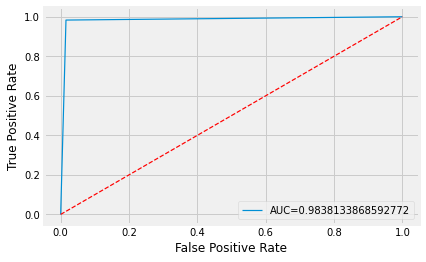

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  xgb_predict)
auc = metrics.roc_auc_score(y_test, xgb_predict)

# Create ROC curve
plt.plot(fpr,tpr,linewidth=1.2,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--',linewidth=1.2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

print('Cross Validation Score: ', cross_val_score(xgb_clf, X_test, y_test, cv=10))

Cross Validation Score:  [0.99293785 0.99152542 0.98585573 0.99009901 0.98161245 0.9844413
 0.98585573 0.97312588 0.97736917 0.98868458]


Upon cross validation, we further observe that the scores were still relatively close to 0.98, therefore it is safe to say that the model did not overfit.

## Conclusion

In conclusion, I have
1. Created a clustering model to better identify customer groups with a better chance of repaying their borrowed loans and what their characteristics are like. However, for future enhancement, more variables can be included, and techniques like PCA can be used to select the best/most useful attributes for clustering, to better classify customer groups together.

2. Created a predictive model that could predict the likelihood of a customer's ability to repay their loan borrowed and achieved an accuracy of 98%. However, in the future, with the actual earnings and fees collected, we could look into predicting the fee charges of a customer looking to borrow a loan, which will lead to a better ability to repay their loan. 

Time spent: 3-4 days (~70 hours)